# Datasets

In [1]:
import matplotlib.pyplot as plt 
from gcpds.image_segmentation.visualizations import plot_contour

## Nerve-UTP


"Nerve-UTP: This dataset was acquired by the Universidad Tecnológica de Pereira (https://www.utp.edu.co) and the Santa Mónica Hospital, Dosquebradas, Colombia. It contains 691 images of the following nerve structures: the sciatic nerve (287 instances), the ulnar nerve (221 instances), the median nerve (41 instances), and  the femoral nerve (70 instances). A SONOSITE Nano-Maxx device was used, fixing a 640 × 480 pixel resolution. Each image was labeled by an anesthesiologist from the Santa Mónica Hospital. As prepossessing, morphological operations such as dilation and erosion were applied. Next, we defined a region of interest by computing the bounding box around each nerve structure. As a result, we obtained images holding a maximum resolution of 360 × 279 pixels. Lastly, we applied a data augmentation scheme to obtain the following samples: 861 sciatic nerve images, 663 ulnar nerve images, 123 median nerve images, and 210 femoral nerve images (1857 input samples)". [Random Fourier Features-Based Deep Learning Improvement with Class Activation Interpretability for Nerve Structure Segmentation](https://www.mdpi.com/1424-8220/21/22/7741).

 Number of images for Partition 1: 1188
 Number of images for Partition 2: 297
 Number of images for Partition 3: 372
Nerves:  Counter({'ciatico': 861, 'cubital': 663, 'femoral': 210, 'mediano': 123})


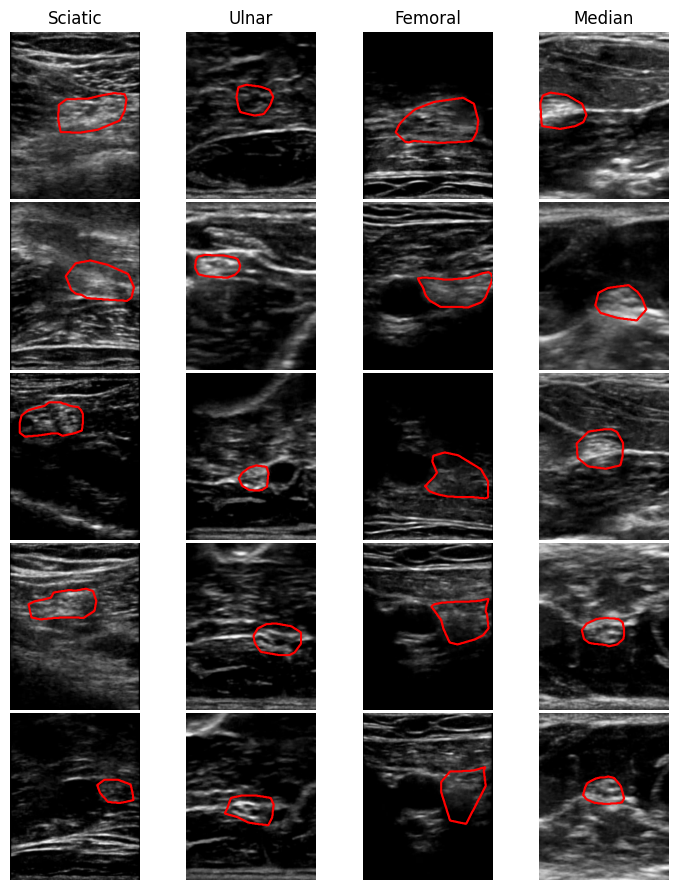

In [118]:
from gcpds.image_segmentation.datasets.segmentation import NerveUtp


dataset = NerveUtp(split=[0.2, 0.2], seed=70)
train_dataset, val_dataset, test_dataset = dataset()
train_dataset = train_dataset.batch(1)
test_dataset = test_dataset.batch(1)
val_dataset = val_dataset.batch(1)

print("Nerves: ", dataset.labels_info)
fig, axes = plt.subplots(5,4,figsize=(10, 9),constrained_layout = True)

row_nerve = {'ciatico': 0, 'cubital': 0, 'femoral': 0, 'mediano': 0}
colum_nerve = {'ciatico': 0, 'cubital': 1, 'femoral': 2, 'mediano': 3}


for img, mask, label, id_img in train_dataset.shuffle(500):

    if sum(row_nerve.values()) == 25:
        break
    
    label = label.numpy()[0].decode()
    i = row_nerve[label]
    j = colum_nerve[label]
    if i >= 5:
        continue

    ax = axes[i,j]
    img = img[0,...,0]
    mask = mask[0,...,0]
    mask_info = (mask,'mask','red'),
    plot_contour(img=img, masks=mask_info, ax=ax)
    ax.get_legend().remove()

    row_nerve[label] +=1 
    

colum_nerve = {'Sciatic': 0, 'Ulnar': 1, 'Femoral': 2, 'Median': 3}
_ = [axes[0,c].set_title(title) for title,c in colum_nerve.items()]
plt.tight_layout()

plt.subplots_adjust(
                    wspace=-0.6)



plt.savefig('NerveUtp.pdf',bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()


## Nerve segment dataset (NSD)

Nerve segment dataset (NSD): This dataset belongs to the Kaggle Competition repository. It holds labeled ultrasound images of the neck concerning the brachial plexus (BP). In particular, 47 different subjects were studied, recording 119 to 580 images  per subject (5635 as a whole) at 420 × 580 pixel resolution.

In [ ]:
from gcpds.image_segmentation.datasets.segmentation import BrachialPlexus

dataset = BrachialPlexus(split=[0.2,0.2],seed=70)
train_dataset, val_dataset, test_dataset = dataset()
train_dataset = train_dataset.batch(1)
test_dataset = test_dataset.batch(1)
val_dataset = val_dataset.batch(1)

plt.figure(figsize=(10, 4))
for img, mask, id_img in train_dataset.take(1):
    plt.subplot(1,2,1)
    plt.imshow(img[0,...],aspect='auto',cmap='gray')
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.imshow(mask[0,...,0],aspect='auto')
    plt.colorbar()

plt.show()

## ThermalFeet: Infrared Thermal Images of Feet 

The thermography database was gathered during the application of epidural anesthesia during labor. Due to complexities during labor, the sample size is relatively small and images of both feet in the same position are not always feasible. The clinicians at SES Hospital Universitario de Caldas developed a timeline for data acquisition: taking the first thermal picture at catheter placement, followed by a picture taken a minute later and every five minutes thereafter, with a total of seven images per patient. The first set of images (196 from 22 women) were captured using a FLIR A320 infrared camera with a 640x480 resolution and a spectral range of 7.5 to 13 $\mu$m. The second set of images (128) were captured using a FLIR E95 thermal camera with improved sensitivity and flexibility, resulting in better image quality. Both sets were labeled for semantic segmentation by three researchers using the CVAT Computer Vision Annotation Tool \footnote{https://cvat.org/}. A total of 166 high-quality images were selected from the first and second set. [Deep Learning Semantic Segmentation of Feet Using Infrared Thermal Images](https://link.springer.com/chapter/10.1007/978-3-031-22419-5_29)

 Number of images for Partition 1: 101
 Number of images for Partition 2: 50
 Number of images for Partition 3: 15


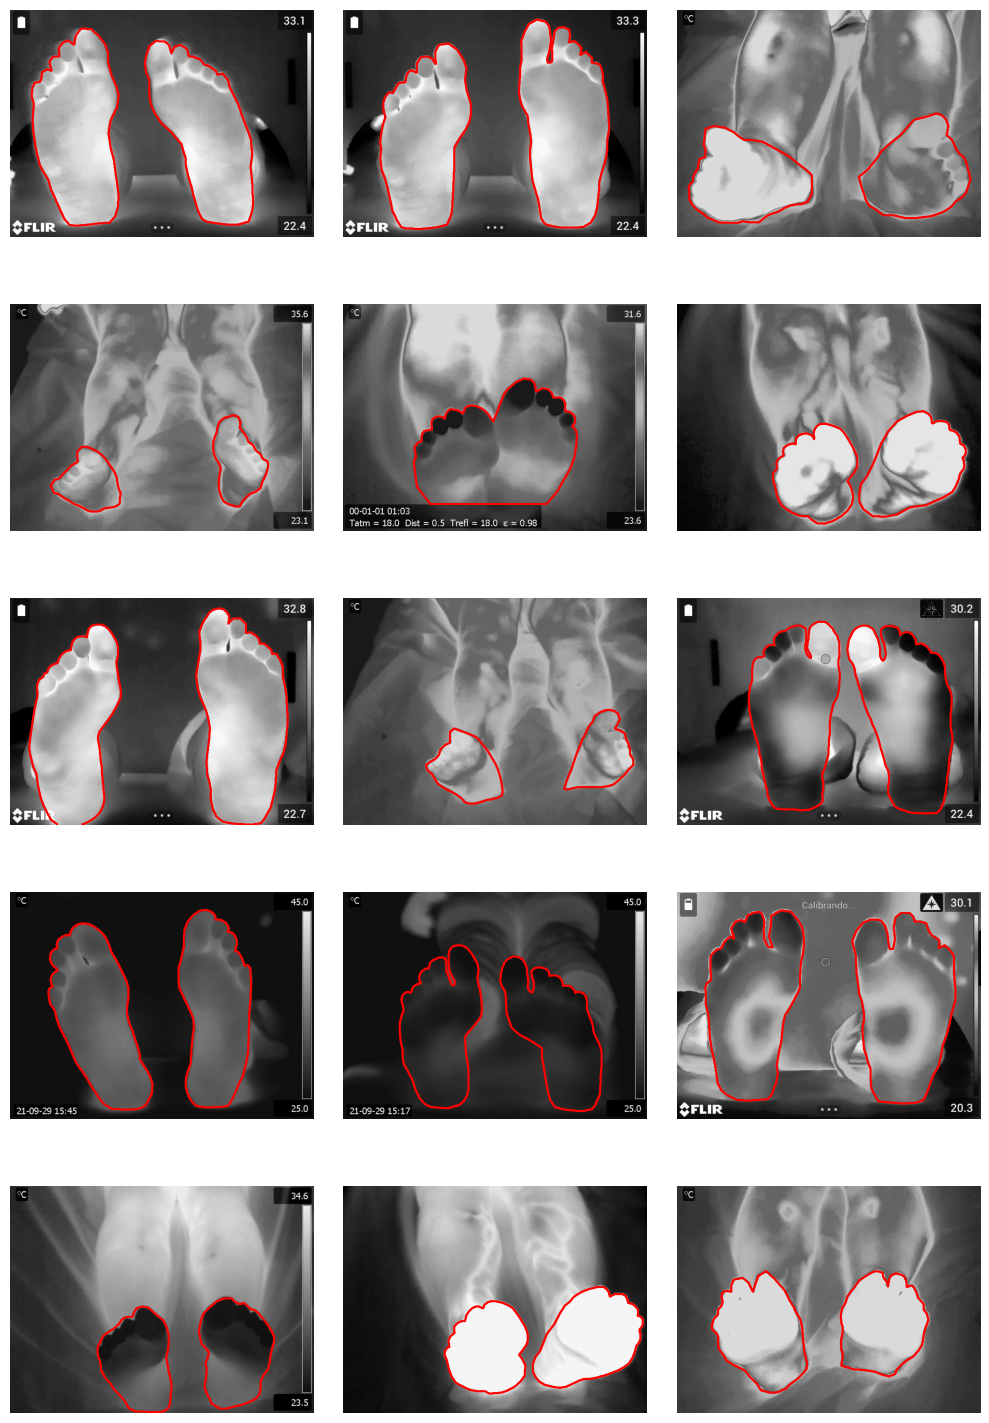

In [143]:
from gcpds.image_segmentation.datasets.segmentation import InfraredThermalFeet

dataset = InfraredThermalFeet(split=[0.05,0.2])
train_dataset, val_dataset, test_dataset = dataset()
train_dataset = train_dataset.batch(1)
test_dataset = test_dataset.batch(1)
val_dataset = val_dataset.batch(1)


fig, axes = plt.subplots(5,3,figsize=(10, 15),constrained_layout = True)
axes = axes.ravel()

for i,(img, mask, id_img) in enumerate(train_dataset.shuffle(200).take(15)):
    ax = axes[i]
    img = img[0,...,0]
    mask = mask[0,...,0]
    mask_info = (mask,'mask','red'),
    plot_contour(img=img, masks=mask_info, ax=ax)
    ax.get_legend().remove()

plt.tight_layout()

plt.subplots_adjust(
                    wspace=0.1,
                    hspace=-0.0)

plt.savefig('Infrared_thermal.pdf',bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

## Oxford Pet

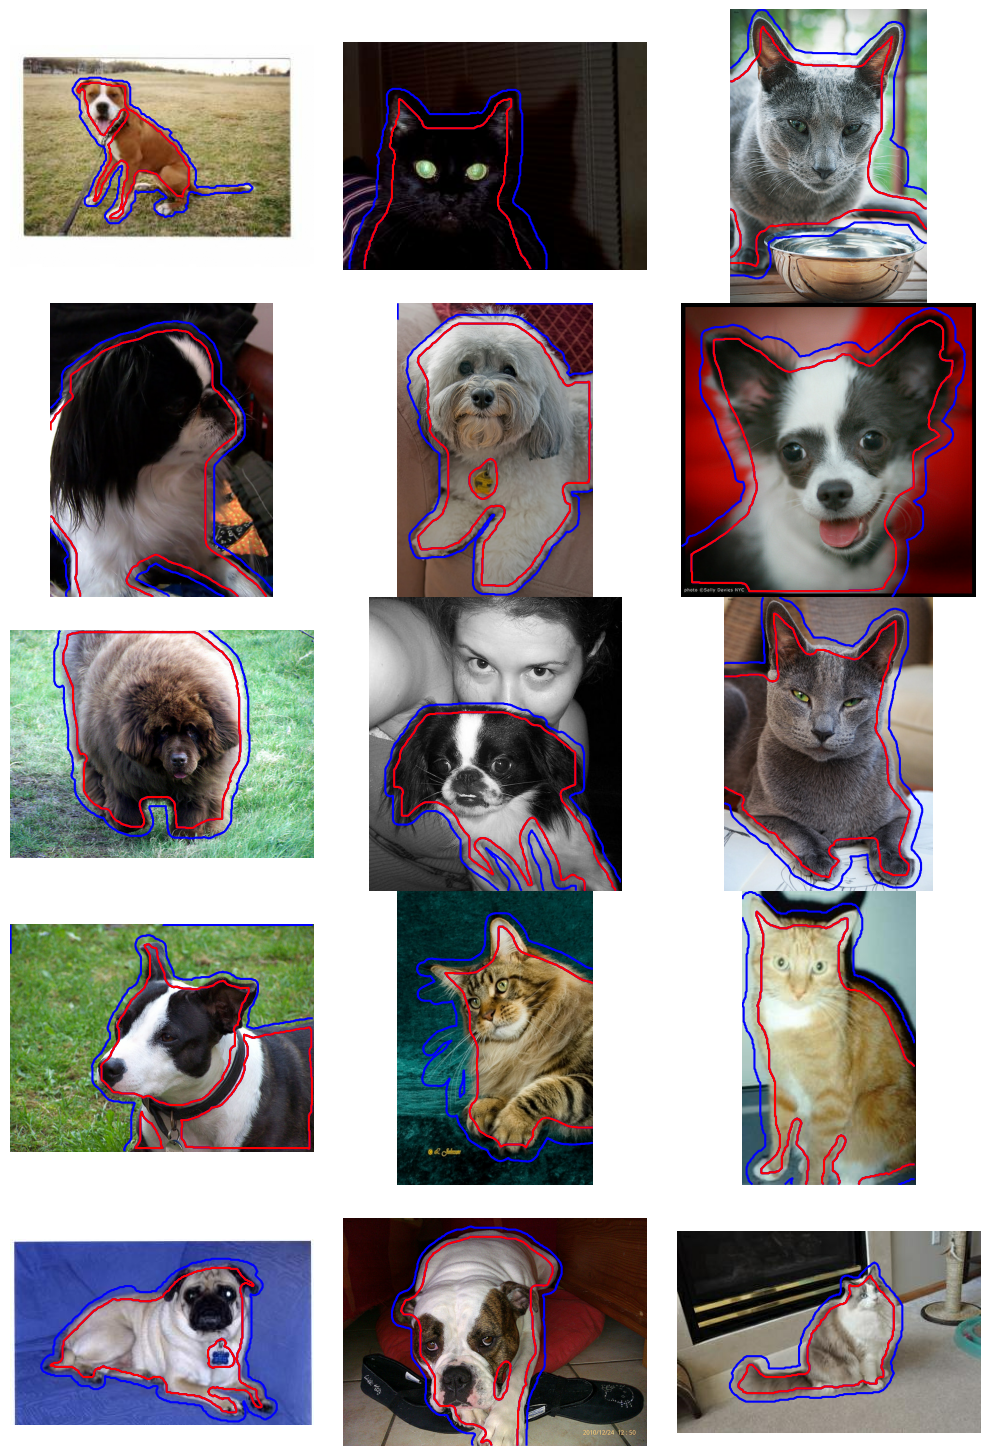

In [17]:
from gcpds.image_segmentation.datasets.segmentation import OxfordIiitPet

dataset = OxfordIiitPet()
train_dataset, val_dataset, test_dataset = dataset()
train_dataset = train_dataset.batch(1)
test_dataset = test_dataset.batch(1)
val_dataset = val_dataset.batch(1)



fig, axes = plt.subplots(5,3,figsize=(10, 15),constrained_layout = True)
axes = axes.ravel()

for i,(img, mask, label,id_img) in enumerate(train_dataset.shuffle(200).take(15)):
    ax = axes[i]
    img = img[0]
    mask = mask[0]
    mask_info = (mask[...,2],'Border','blue'),(mask[...,0],'Foreground','red')
    plot_contour(img=img, masks=mask_info, ax=ax)
    ax.get_legend().remove()
    # plt.subplot(1,2,1)
    # plt.imshow(img[0,...],aspect='auto', cmap='gray')
    # plt.colorbar()
    # plt.subplot(1,2,2)
    # plt.imshow(mask[0,...,0],aspect='auto')
    # plt.colorbar()

plt.tight_layout()

plt.subplots_adjust(
                    wspace=0.1,
                    hspace=-0.0)


plt.savefig('oxford_pet.pdf',bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

## Tomato Seeds

 Number of images for Partition 1: 72
 Number of images for Partition 2: 19
 Number of images for Partition 3: 5


2023-01-25 21:10:30.023602: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 196608000 exceeds 10% of free system memory.


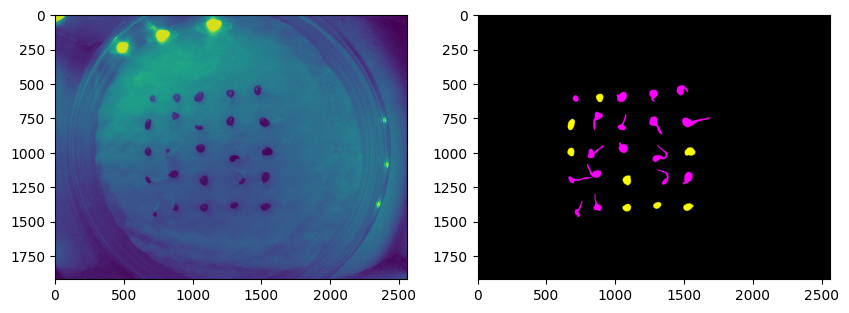

In [9]:
from gcpds.image_segmentation.datasets.segmentation import TomatoSeeds

dataset = TomatoSeeds(split=[0.05,0.2])
train_dataset, val_dataset, test_dataset = dataset()
train_dataset = train_dataset.batch(10)
test_dataset = test_dataset.batch(10)
val_dataset = val_dataset.batch(10)


plt.figure(figsize=(10, 4))
for img, mask, id_img in train_dataset.take(1):
    plt.subplot(1,2,1)
    plt.imshow(img[2])
    plt.subplot(1,2,2)
    plt.imshow(mask[2])

plt.show()